In [ ]:
from sklearn.datasets import fetch_covtype
covtype = fetch_covtype()
print(covtype.DESCR)


.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional a

In [ ]:
import pandas as pd
df = pd.DataFrame(covtype.data, 
                  columns=["x{:02d}".format(i + 1) for i in range(covtype.data.shape[1])],
                  dtype=int)
sy = pd.Series(covtype.target, dtype="category")
df['covtype'] = sy
df.tail()

,x01,x02,x03,x04,x05,x06,x07,x08,x09,x10,...,x46,x47,x48,x49,x50,x51,x52,x53,x54,covtype
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,0,3


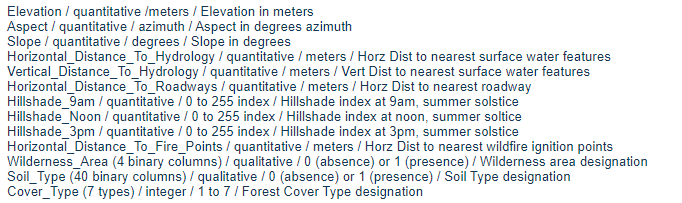

위의 데이터는 미국 산림을 일정 넓이 마다 나눠서 땅의 환경에 따라 자라고있는 나무의 종류를 구분해놓은 데이터입니다.

총 데이터는 58만개가 있고 특징은 54개가 있으며 마지막 covtype이 나무의 종류를 나타냅니다. 나무의 종류는 총 7개로 [1,2,3,4,5,6,7]로 구분됩니다.

1. 학습을 위해 다섯개의 특징을 가진 특징 집합 (특징 집합 A,B) 두개를 선택합니다. 집합 A와 집합 B는 많아야 두개의 특징을 공유할 수 있습니다.
2. 이 데이터에 대해서 multiclass classification 문제를 푸는 신경망을 정의하고 집합 A와 집합 B 그리고 tensorflow를 이용해서 학습을 진행합니다.
3. 동일한 테스트 데이터 100개를 이용해서 집합 A와 집합 B를 이용해서 학습한 신경망을 테스트하여 두 집합 중 어느 것이 classication을 위해 좋은 데이터인지 판단해 보시오. 판정을 위해 테스트 데이터에 대한 판별 성공률을 이용하시오.